<a href="https://colab.research.google.com/github/guabriola/MIT_DataScience_MachineLearning/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DataScience&ML(MIT)/Foundations-Python and Statistics/Week_2_Statistics_for_Data_Science/foodhub_order.csv')
# returns the first 5 rows
df_cpy = df.copy()
df_cpy.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df_cpy.shape

(1898, 9)

#### Observations:
* Rows: 1898
* Columns: 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three diferents datatypes:
* int64
* float64
* object

By the information in data dictionary, about object types we can presume:

* restaurant_name: This is probably text.
* kitchen_type: It is a text that indicates the type of kitchen.
* day_of_the_week: Indicates whether the order was placed on a weekday or on the weekend (can be text or can be treated as a category).
* rating: Although it is expected to be a numeric value, there may be non-numeric values ​​(such as "Not Rated"), which would cause it to be considered an object.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:

df_cpy.isnull().sum()
# We can confirm it._cpy.isnull().sum(

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
* There are no missing values in data.
* We have some orders that clients didn't rate but are filled with text Not given.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
df_cpy.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Food preparation time (Minutes):
* Average - 27.37
* Minimum - 20.00
* Maximum - 35.00

### **Question 5:** How many orders are not rated?

In [ ]:
#Since the data type of 'rating' object, I analyze the values in this column to determine what value is assigned when food is not rated
df_cpy['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Counting rows that have rating 'Not given'
(df_cpy['rating'] == 'Not given').value_counts()

,count
rating,
False,1162
True,736


#### Observations:
* We have 736 not rated orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

### **Week day distribution**

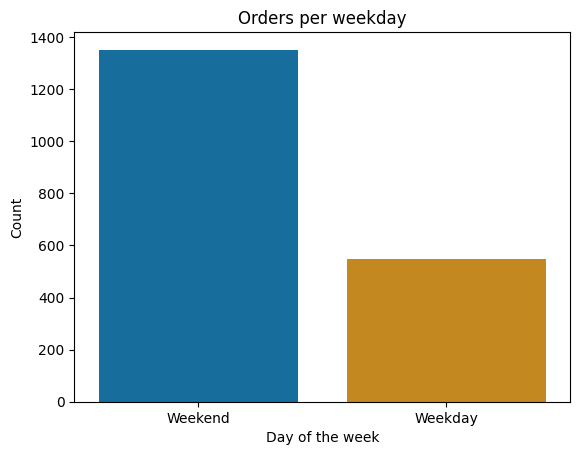

In [ ]:
sns.countplot(data=df_cpy, x='day_of_the_week', palette='colorblind')

plt.title('Orders per weekday')
plt.xlabel('Day of the week')
plt.ylabel('Count')

plt.show()

#### Observations:
The majority of orders are placed on weekends.

### **Cuisine type distribution**

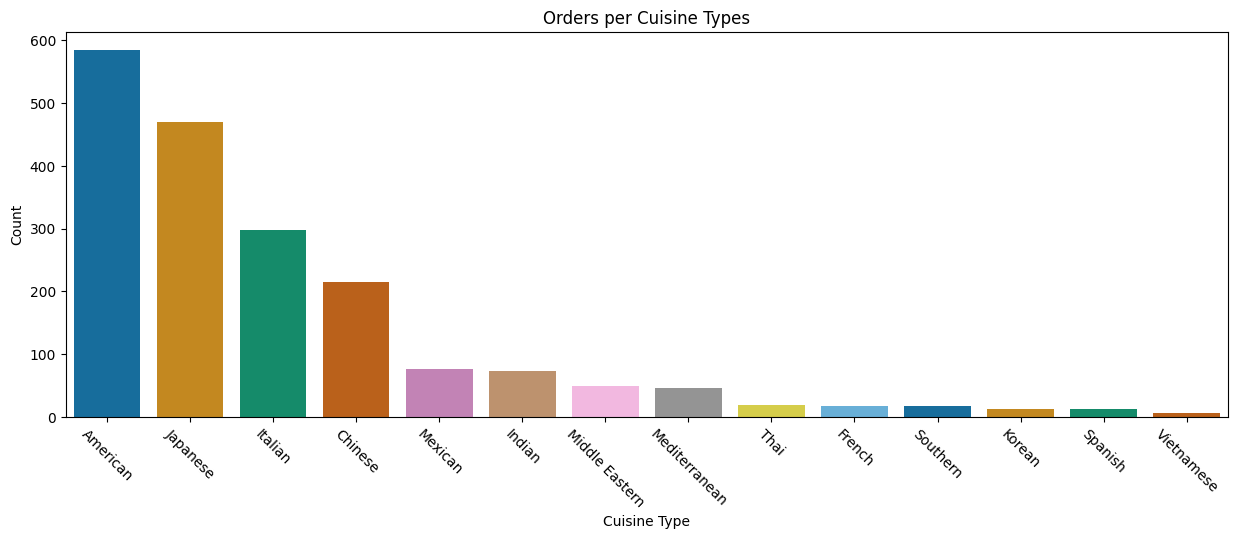

In [ ]:
plt.figure(figsize= (15, 5))
# Order the categories based on the count
order = df_cpy['cuisine_type'].value_counts().index

sns.countplot(data=df_cpy, x='cuisine_type', order=order, palette='colorblind')
plt.xticks(rotation=-45)

plt.title('Orders per Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

plt.show()

#### Observations:
It can be easily seen that American and Japanese foods are the most ordered, followed by Italian and Chinese, respectively

### **Rating distribution**

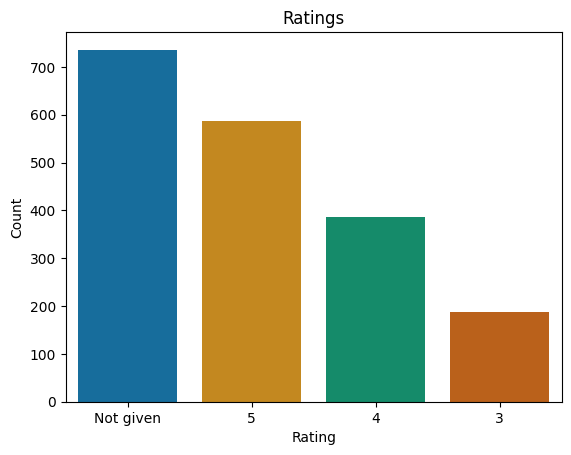

Orders with no rates: 38.78%


In [ ]:
# Order the categories based on the count
order = df_cpy['rating'].value_counts().index

sns.countplot(data=df_cpy, x='rating', order=order, palette='colorblind')

plt.title('Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

total_count = df_cpy['rating'].count()
not_given_count = df_cpy[df_cpy['rating'] == 'Not given']['order_id'].count()
percentage_not_giiven = (not_given_count * 100)/total_count
print('Orders with no rates: ' + str(round(percentage_not_giiven, 2)) + '%' )

#### Observations:
The number of clients who don't rate their orders is considerably high (38.78%). Maybe some measures can be taken to incentivize clients to start rating.

### **Food preparation time distribution**

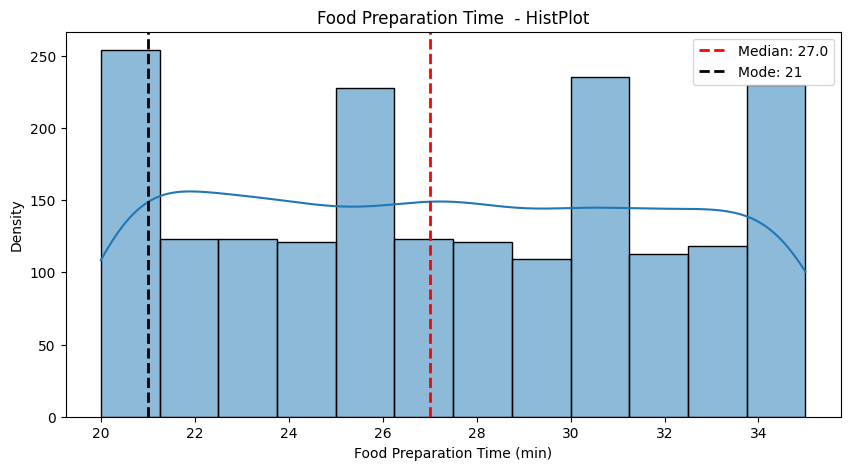

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_cpy, x='food_preparation_time', kde=True)

median_value = np.round(df_cpy['food_preparation_time'].median(), 2)
mode_value = df_cpy['food_preparation_time'].mode()[0]


# Drowing the median and mode line
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label=f'Median: {median_value}')
plt.axvline(mode_value, color='black', linestyle='--', linewidth=2, label=f'Mode: {mode_value}')

#Legend
plt.legend()

plt.title('Food Preparation Time  - HistPlot')
plt.xlabel('Food Preparation Time (min)')
plt.ylabel('Density')

plt.show()

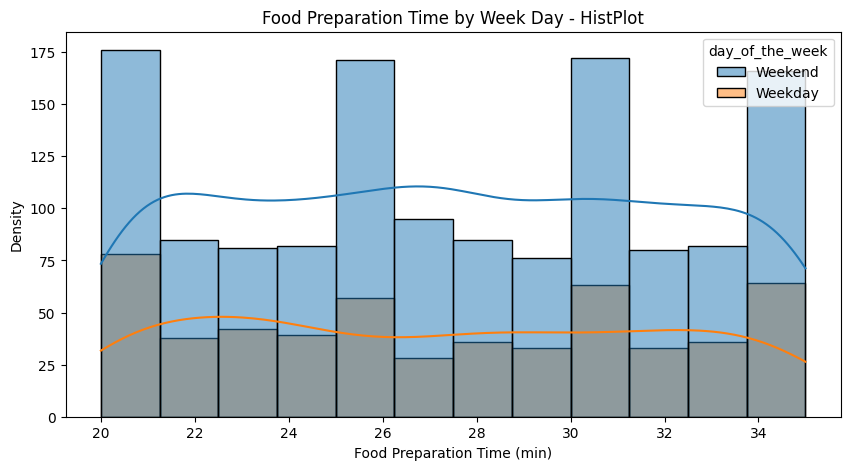

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_cpy, x='food_preparation_time', hue='day_of_the_week', kde=True)

plt.title('Food Preparation Time by Week Day - HistPlot')
plt.xlabel('Food Preparation Time (min)')
plt.ylabel('Density')

plt.show()

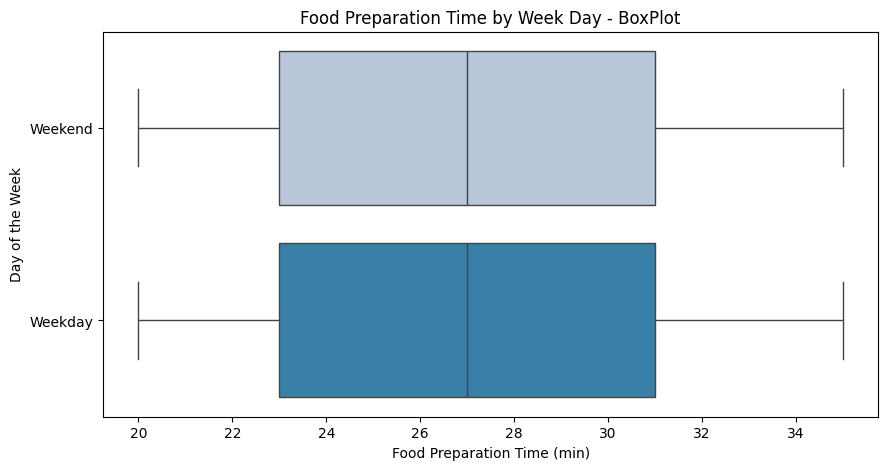

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df_cpy, x='food_preparation_time', y='day_of_the_week', palette = 'PuBu')

plt.title('Food Preparation Time by Week Day - BoxPlot')
plt.xlabel('Food Preparation Time (min)')
plt.ylabel('Day of the Week')

plt.show()

#### Observations:
It can be seen in the histogram and boxplot that the time spent preparing food follows a uniform distribution and does not vary between weekdays and weekends. Therefore, we can infer that the preparation time remains consistent throughout the week.

### **Delivery time distribution**

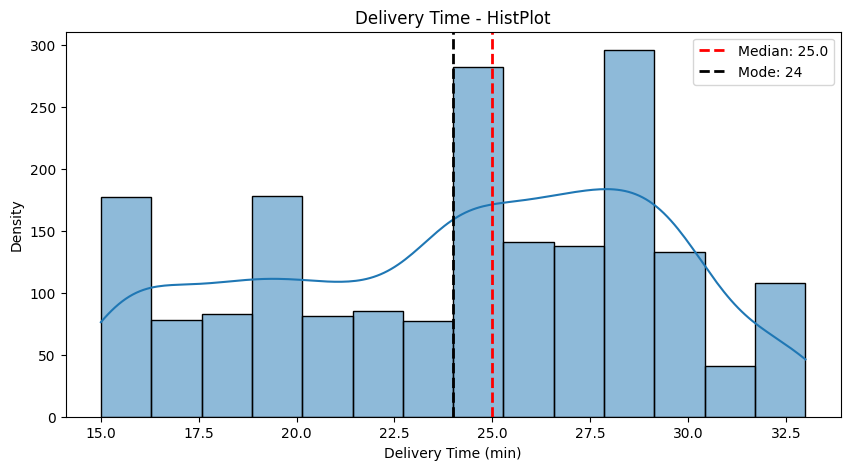

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_cpy, x='delivery_time', kde=True)

median_value = np.round(df_cpy['delivery_time'].median(), 2)
mode_value = df_cpy['delivery_time'].mode()[0]


# Drowing the median and mode line
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label=f'Median: {median_value}')
plt.axvline(mode_value, color='black', linestyle='--', linewidth=2, label=f'Mode: {mode_value}')

#Legend
plt.legend()

plt.title('Delivery Time - HistPlot')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Density')

plt.show()

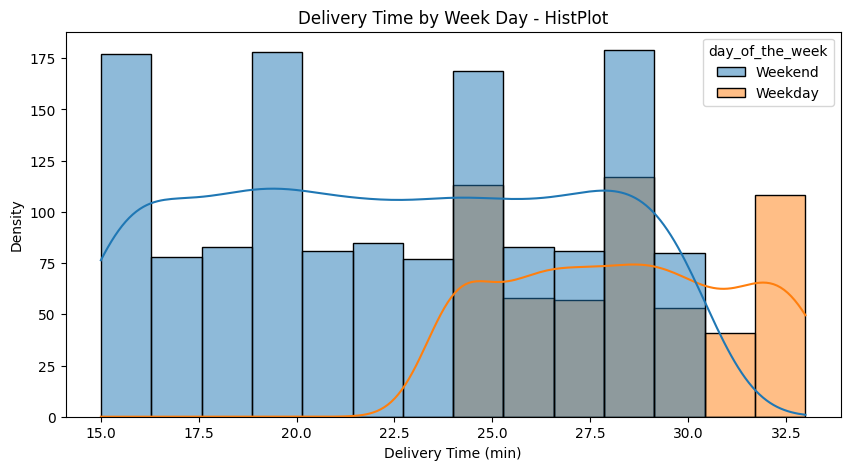

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_cpy, x='delivery_time', hue='day_of_the_week', kde=True)

plt.title('Delivery Time by Week Day - HistPlot')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Density')

plt.show()

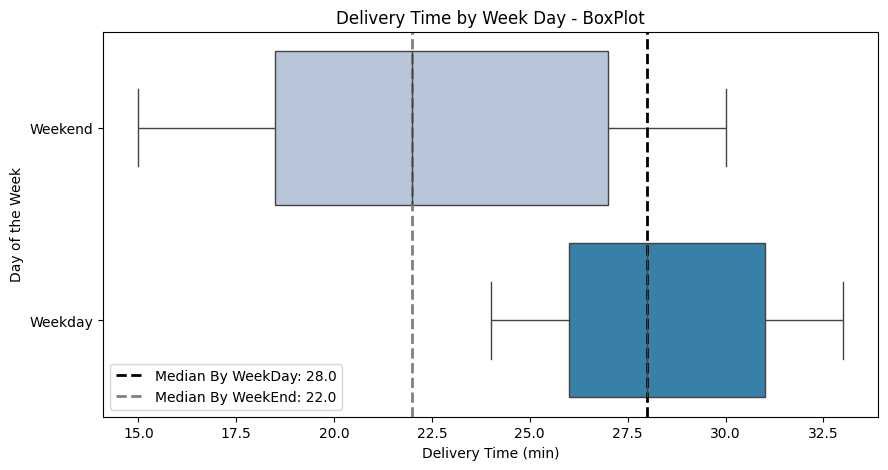

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df_cpy, x='delivery_time', y='day_of_the_week', palette = 'PuBu')

median_by_week = np.round(df_cpy.groupby(['day_of_the_week'])['delivery_time'].median(), 2)[0]
median_by_weekend = np.round(df_cpy.groupby(['day_of_the_week'])['delivery_time'].median(), 2)[1]

# Drowing the median and mode line
plt.axvline(median_by_week, color='black', linestyle='--', linewidth=2, label=f'Median By WeekDay: {median_by_week}')
plt.axvline(median_by_weekend, color='grey', linestyle='--', linewidth=2, label=f'Median By WeekEnd: {median_by_weekend}')


#Legend
plt.legend()

plt.title('Delivery Time by Week Day - BoxPlot')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Day of the Week')

plt.show()

#### Observations:
We can infer that delivery time increases on weekdays. It is also uniformly distributed but slightly right-skewed in both cases, according to the boxplots.

### **Cost of the order Distribution**

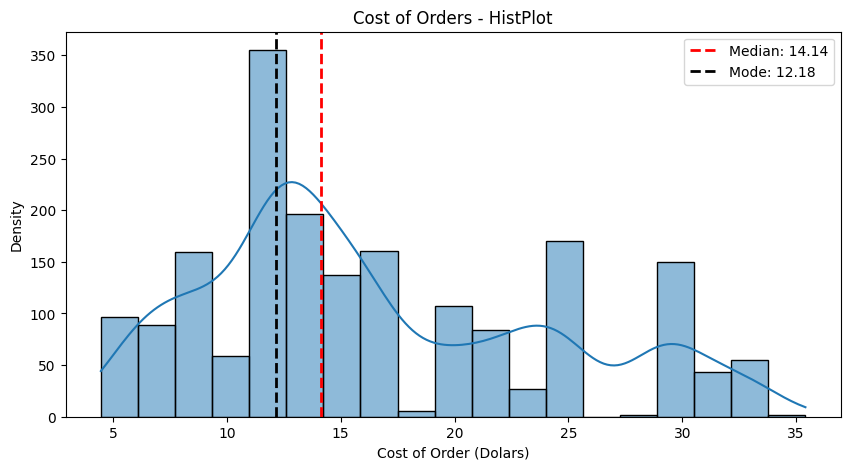

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_cpy, x='cost_of_the_order', kde=True)

median_value = np.round(df_cpy['cost_of_the_order'].median(), 2)
mode_value = df_cpy['cost_of_the_order'].mode()[0]


# Drowing the median and mode line
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label=f'Median: {median_value}')
plt.axvline(mode_value, color='black', linestyle='--', linewidth=2, label=f'Mode: {mode_value}')

#Legend
plt.legend()

plt.title('Cost of Orders - HistPlot')
plt.xlabel('Cost of Order (Dolars)')
plt.ylabel('Density')

plt.show()

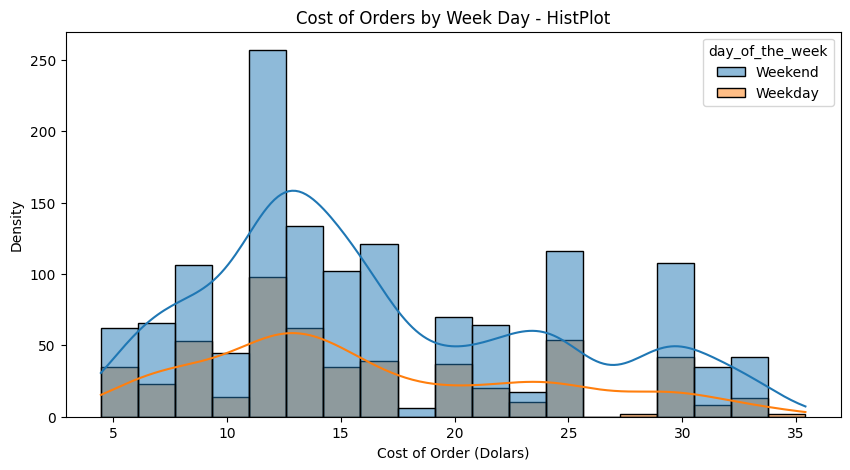

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_cpy, x='cost_of_the_order', hue='day_of_the_week', kde=True)
plt.title('Cost of Orders by Week Day - HistPlot')
plt.xlabel('Cost of Order (Dolars)')
plt.ylabel('Density')
plt.show()

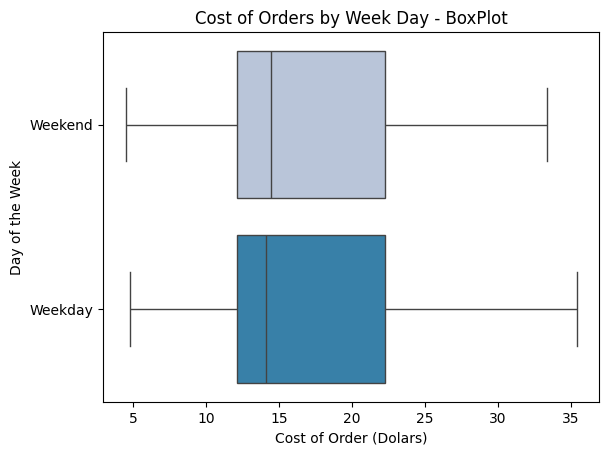

In [ ]:
sns.boxplot(data=df_cpy, x='cost_of_the_order',  y='day_of_the_week', palette = 'PuBu')
plt.title('Cost of Orders by Week Day - BoxPlot')
plt.xlabel('Cost of Order (Dolars)')
plt.ylabel('Day of the Week')
plt.show()

#### Observations:
The cost of orders does not vary significantly between weekdays and weekends.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

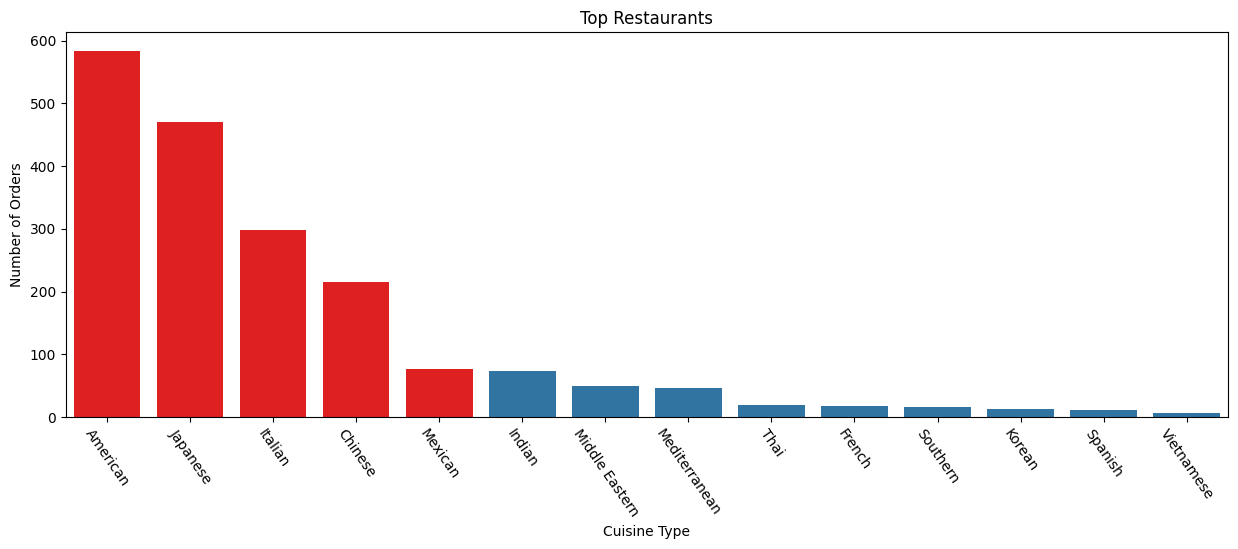

In [ ]:
plt.figure(figsize= (15, 5))
# Order the categories based on the count
order = df_cpy['cuisine_type'].value_counts().index

colors = ['red' if i < 5 else '#1f77b4' for i in range(len(order))]


sns.countplot(data=df_cpy, x='cuisine_type', order=order, palette=colors)
plt.title('Top Restaurants')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=-55)

plt.show()

#### Observations:
Top 5 Restaurants:
#####1- American
#####2- Japanese
#####3- Italian
#####4- Chinese
#####5- Mexican

### **Question 8**: Which is the most popular cuisine on weekends?

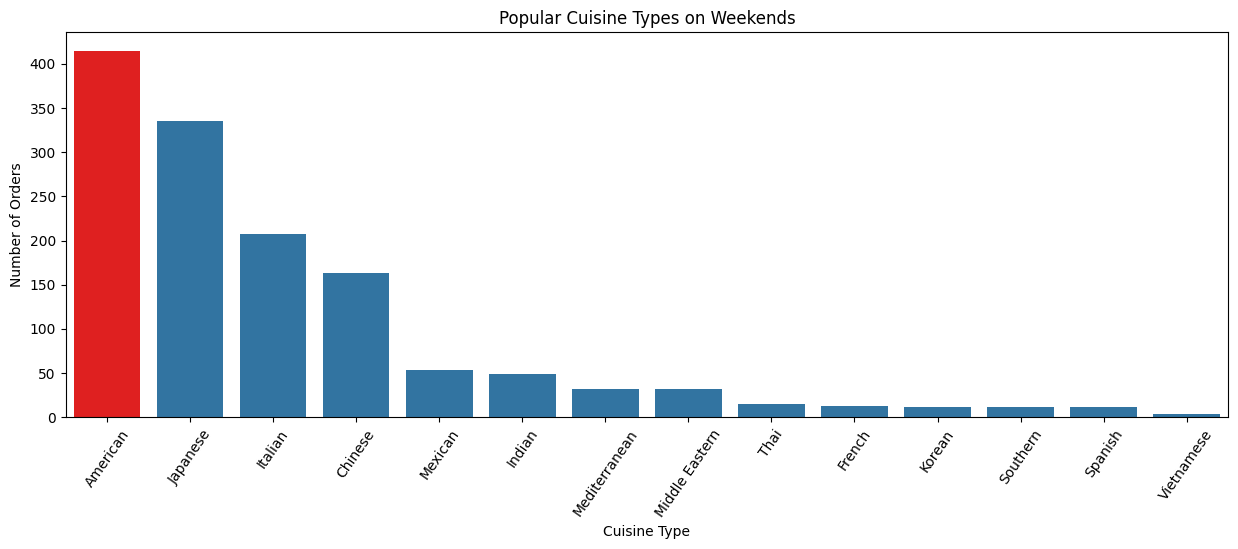

In [ ]:
#Creating plot
plt.figure(figsize=(15, 5))
#Most popular cuisine in Red
colors = ['red' if i < 1 else '#1f77b4' for i in range(len(order))]
#Selecting orders only on weekends
weekend_data_counts = df_cpy[df_cpy['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

#Plot
sns.barplot(x=weekend_data_counts.index, y=weekend_data_counts.values, palette=colors)

plt.title('Popular Cuisine Types on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=55)

plt.show()

#### Observations:
The most popular cuisine type on weekend is Amercian cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

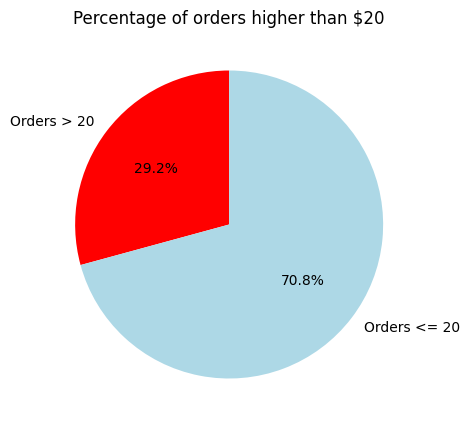



Total of orders: 1898.
Total of orders higher than $20: 555.
The percentage of orders higher than $20 is 29.24%.


In [ ]:
#Calculating porcentage
total_orders = df_cpy.shape[0]
higher_orders = df_cpy.loc[df_cpy['cost_of_the_order']>20].shape[0]
porcent = (higher_orders * 100)/total_orders

#Creating graph
labels = ['Orders > 20','Orders <= 20']
sizes = [porcent, 100-porcent]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'lightblue'])
plt.title('Percentage of orders higher than $20')
plt.show()

#Printing message
print('\n')
print('Total of orders: ' + str(total_orders)+ '.')
print('Total of orders higher than $20: ' + str(higher_orders) + '.')
print('The percentage of orders higher than $20 is ' + str(np.round(porcent, 2)) + '%.')

#### Observations:
The percentage of orders higher than $20 is 29.24%.

### **Question 10**: What is the mean order delivery time?

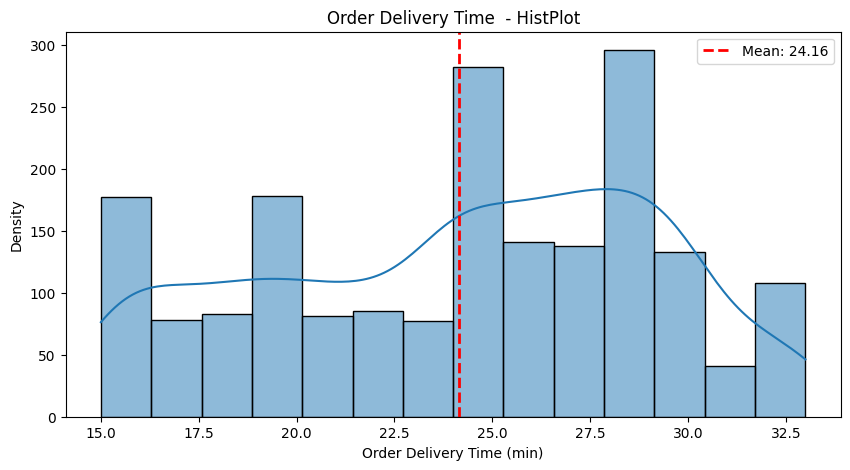

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_cpy, x='delivery_time', kde=True)

mean_value = np.round(df_cpy['delivery_time'].mean(), 2)

# Drowing mean line
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value}')

#Legend
plt.legend()

plt.title('Order Delivery Time  - HistPlot')
plt.xlabel('Order Delivery Time (min)')
plt.ylabel('Density')

plt.show()

#### Observations:
The mean order delyvery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

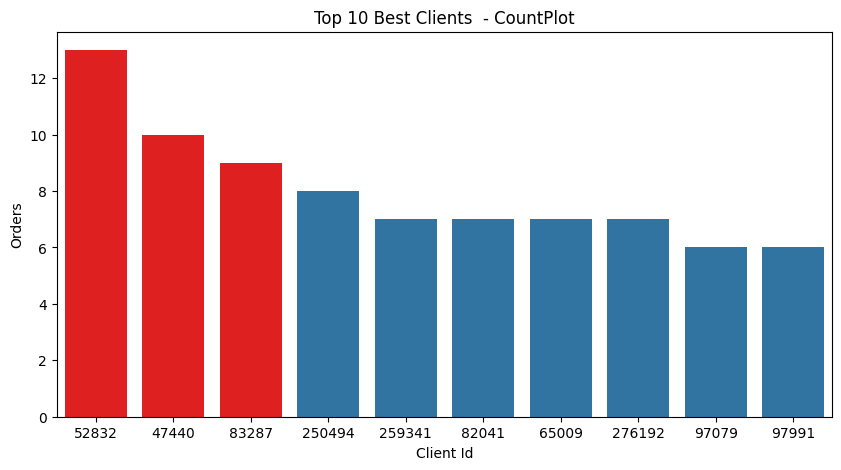

In [ ]:
#Extracting orders by client
top_ten_customers = df_cpy['customer_id'].value_counts().head(10)

#Top 10 of clients by number of orders.
order = top_ten_customers.index
#Top 3 on Red
colors = ['red' if i < 3 else '#1f77b4' for i in range(len(order))]
plt.figure(figsize=(10,5))
sns.barplot(x=top_ten_customers.index, y=top_ten_customers.values, order=order, palette=colors)

plt.title('Top 10 Best Clients  - CountPlot')
plt.xlabel('Client Id')
plt.ylabel('Orders')

plt.show()

In [ ]:
top_three_customers = df_cpy['customer_id'].value_counts().head(3)
print('Total of orders for each client of the top three:')
top_three_customers

Total of orders for each client of the top three:


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Id for top 3 most frequent customer id's are:
* Id - 52832
* Id - 47440
* Id - 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

### Cheking correlation between 'cost_of_the_order', 'rating', 'food_preparation_time' and 'delivery_time'

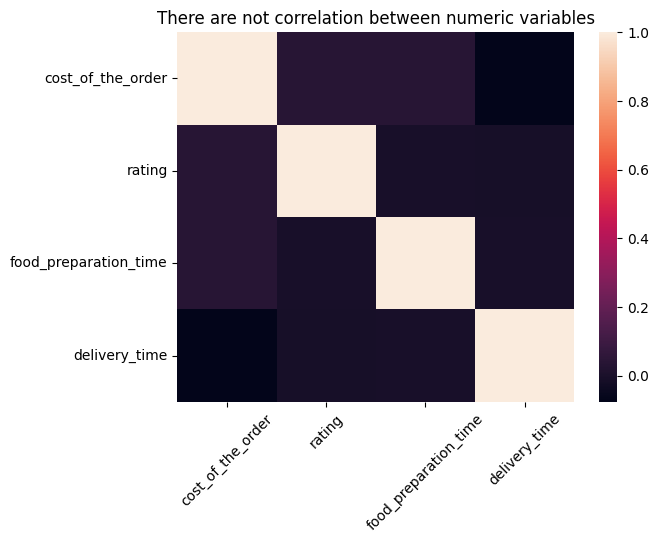

In [ ]:
#df_clean_ratings is a copy of the data set
df_clean_ratings = df_cpy.copy()
#Rows to delete
rows_to_delete = df_clean_ratings.loc[df_clean_ratings['rating'] == 'Not given'].index

#Deleting rows with rating Not Given and changing dtype to int
df_clean_ratings.drop(rows_to_delete, axis=0, inplace=True)
df_clean_ratings['rating'] = df_clean_ratings['rating'].astype('int')

#Plot
sns.heatmap(data=df_clean_ratings[['cost_of_the_order','rating','food_preparation_time','delivery_time']].corr());
plt.title('There are not correlation between numeric variables')
plt.xticks(rotation=45)
plt.show()

* The df_clean_ratings data frame was created without "Not Given" ratings for this and subsequent studies to be able to correctly calculate the value of the ratings as mean, median and mode.

* It was preferred to eliminate the rows and not replace the data with mean or median because these can affect the calculations and it is believed that the lack of rating can help to infer other conclusions.

* This will be used only in studies where it is believed that the lack of data from the eliminated orders will not affect the study.

#### Observations:
> There is no evidence that variables on this plot are correlated.What means that Cost of order, rating, food preparation time or delivery time are not related each other. None significantly affects any other.

### Cuisine Type and numerical variables

#### Cuisine Type and Cost of the order

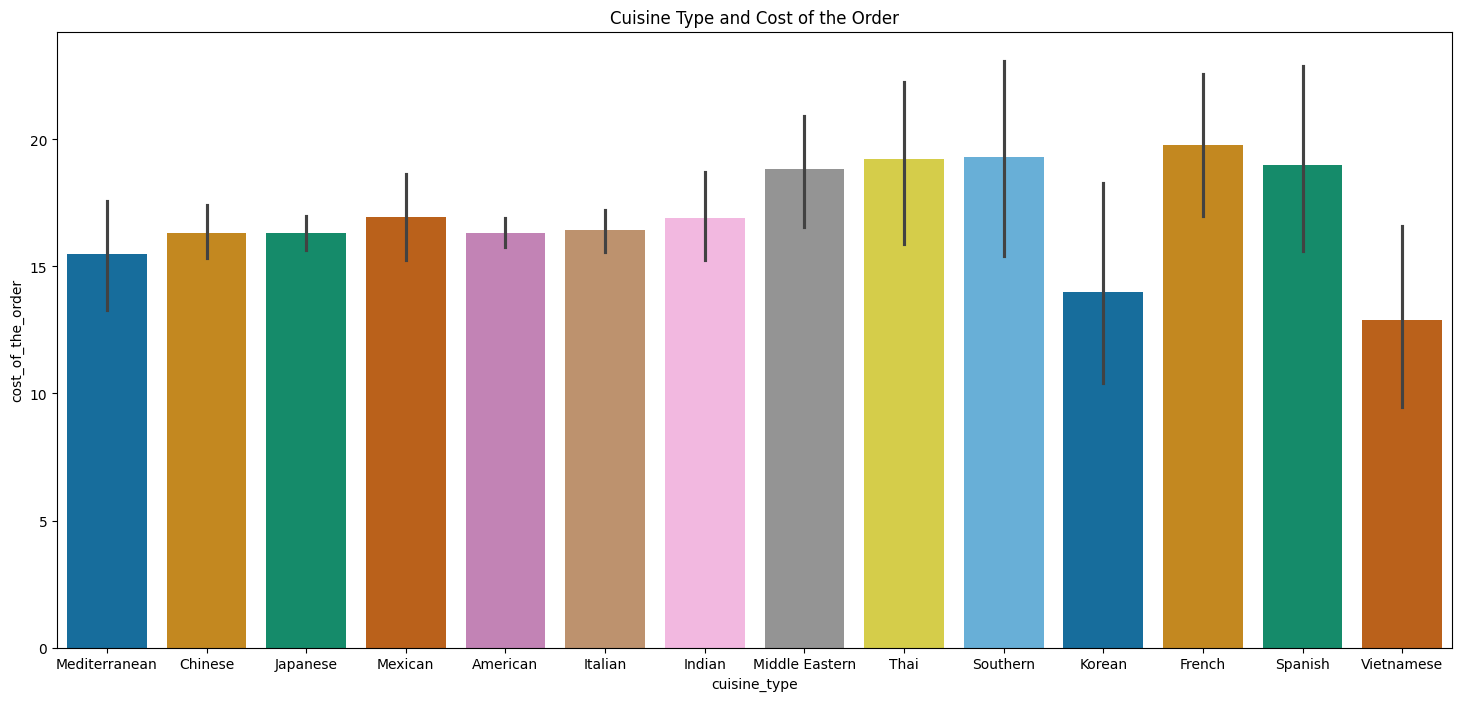

In [ ]:
df_sort = df_cpy.sort_values('cost_of_the_order', ascending=False)

plt.figure(figsize=(18,8))
sns.barplot(data=df_sort, x='cuisine_type', y='cost_of_the_order', palette='colorblind')
plt.title('Cuisine Type and Cost of the Order')
plt.show()

# order = df_cpy['cuisine_type'].value_counts().index

# sns.countplot(data=df_cpy, x='cuisine_type', order=order, palette='colorblind')
# plt.xticks(rotation=-45)

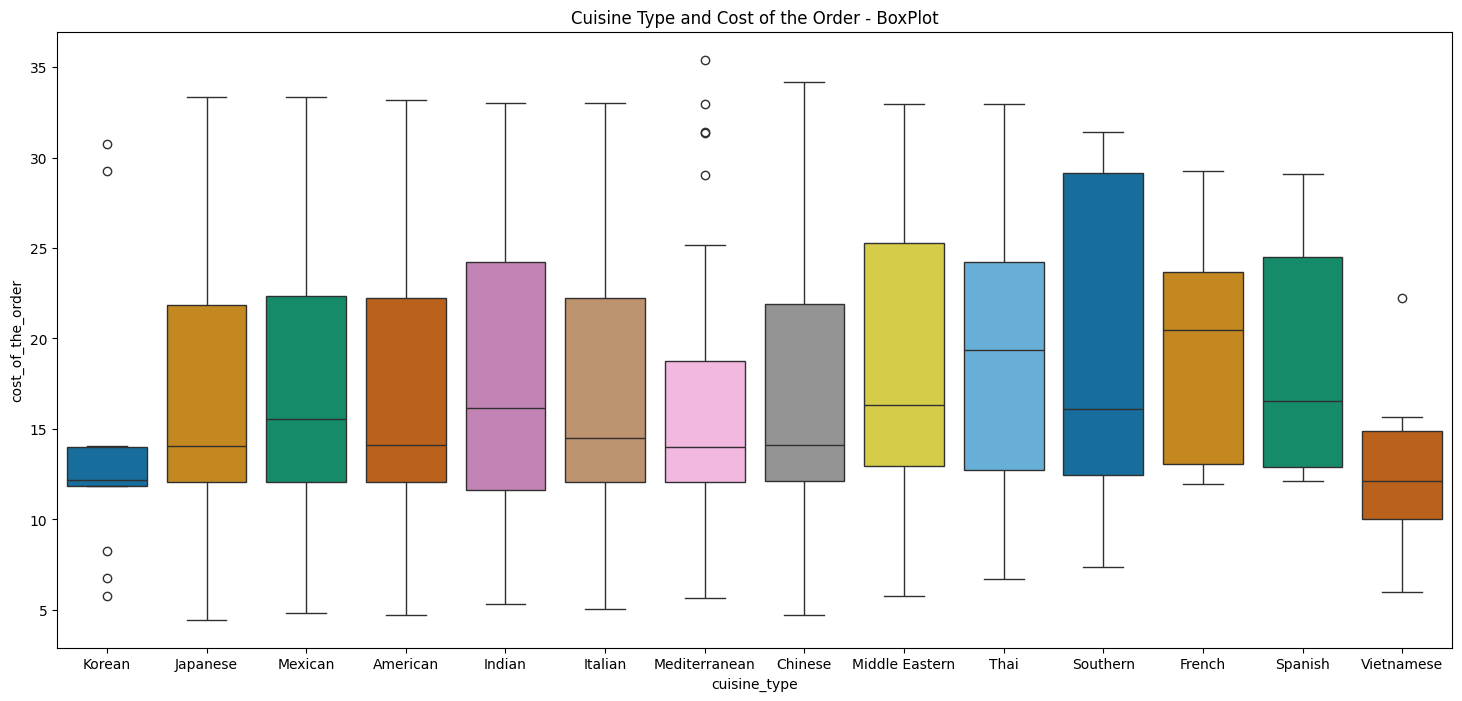

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_cpy, x='cuisine_type', y='cost_of_the_order', palette='colorblind')
plt.title('Cuisine Type and Cost of the Order - BoxPlot')
plt.show()

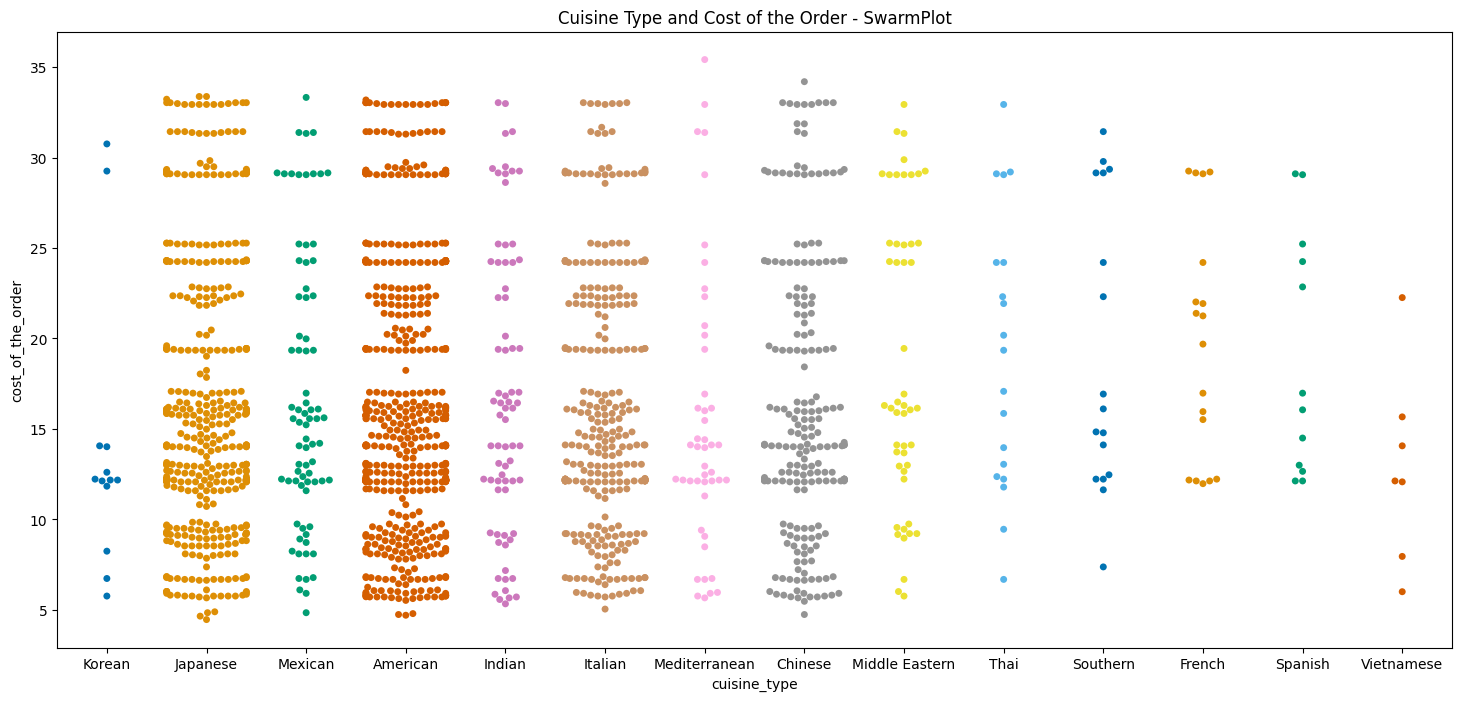

In [ ]:
plt.figure(figsize=(18,8))
sns.swarmplot(data=df_cpy, x='cuisine_type', y='cost_of_the_order', palette='colorblind')
plt.title('Cuisine Type and Cost of the Order - SwarmPlot')
plt.show()

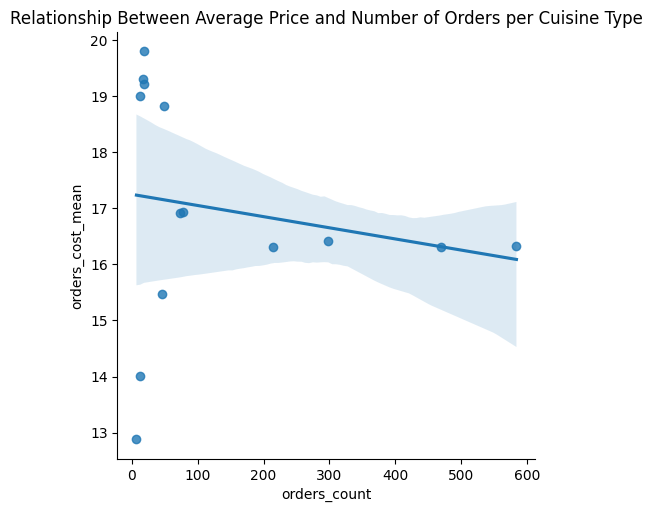

In [ ]:
mean_number_of_orders_df = df_cpy.groupby('cuisine_type').agg(
    orders_count=('cost_of_the_order', 'size'),     # Contar el número de órdenes
    orders_cost_mean=('cost_of_the_order', 'mean')        # Calcular el promedio del costo
).reset_index()

# sns.scatterplot(data=df, x='engine_size', y='horsepower');
sns.lmplot(data=mean_number_of_orders_df, x='orders_count', y='orders_cost_mean')
plt.title('Relationship Between Average Price and Number of Orders per Cuisine Type')
plt.show()

##### Obervations:
* Higher price in orders: Souther and Middle Eastern
* Higher average prices in order: French, Southern, Thai, Spanish, Middle Eastern
* More sales: American, Chainese, Italian, Japanese.
* Less sales:  Middle Eastern, Thai, Southern, French, Spanish, Vietnamese.


>From the last plot, we can see that the food type that is most desired by the customer the prices tend to normalize or converge within the same range.



#### Cuisine Type and Rating

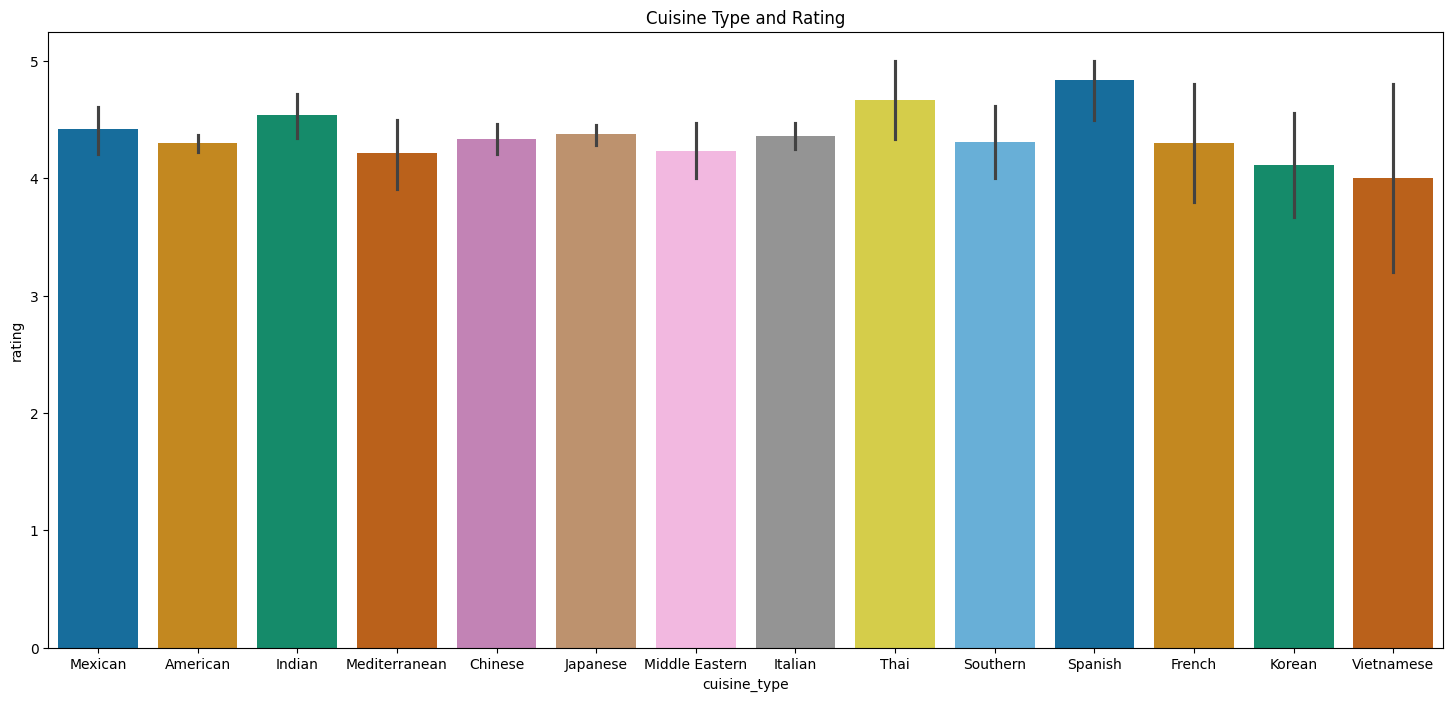

In [ ]:
#df_clean_ratings is used because dosn't have rows with "Not Given" ratings.
plt.figure(figsize=(18,8))
sns.barplot(data=df_clean_ratings, x='cuisine_type', y='rating', palette='colorblind')
plt.title('Cuisine Type and Rating')
plt.show()

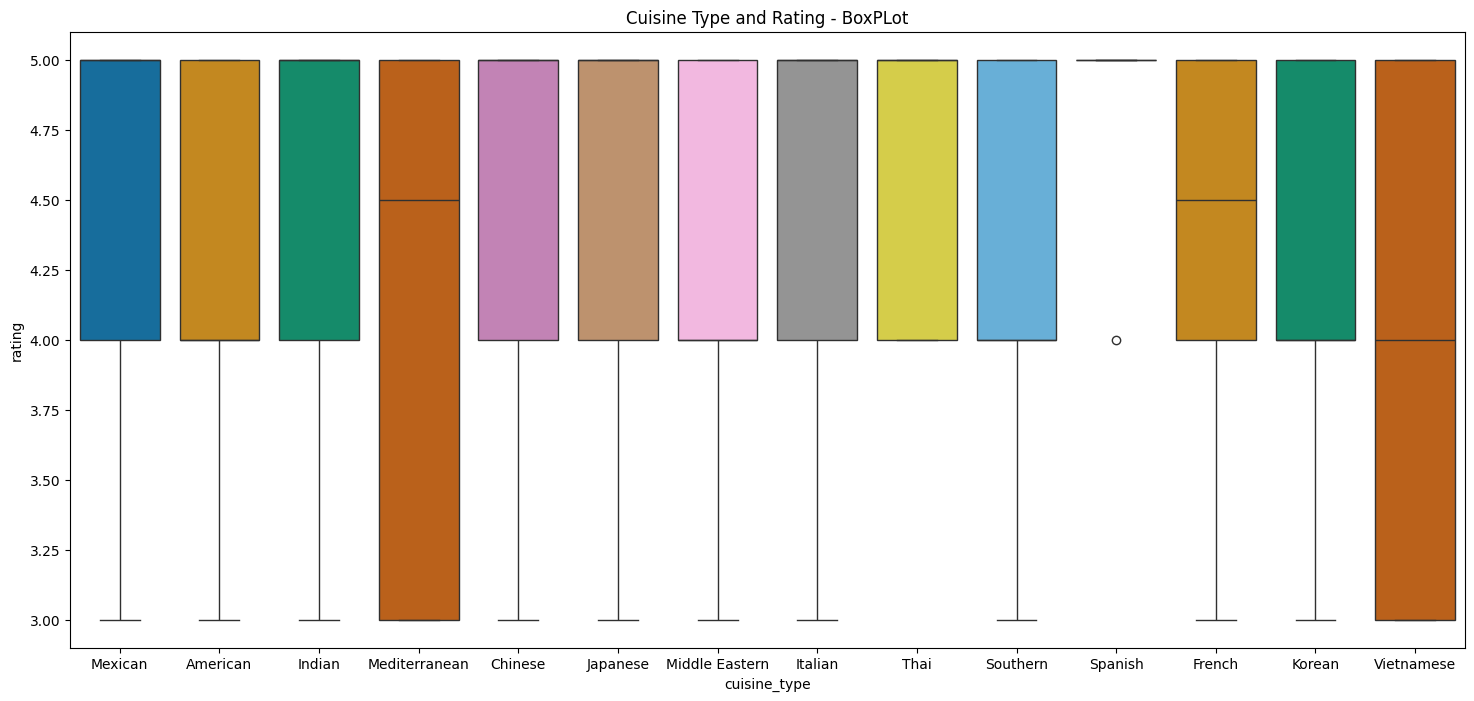

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_clean_ratings, x='cuisine_type', y='rating', palette='colorblind')
plt.title('Cuisine Type and Rating - BoxPLot')
plt.show()

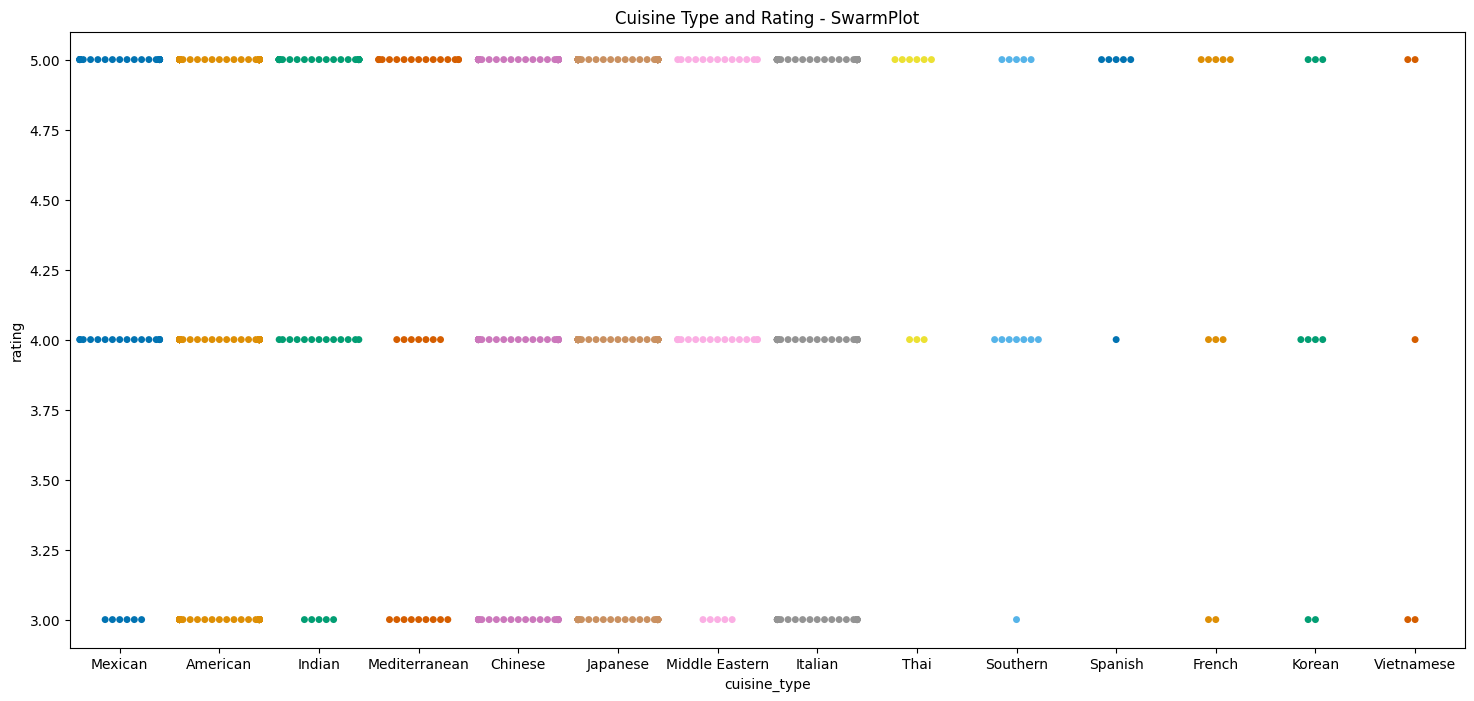

In [ ]:
plt.figure(figsize=(18,8))
sns.swarmplot(data=df_clean_ratings, x='cuisine_type', y='rating', palette='colorblind')
plt.title('Cuisine Type and Rating - SwarmPlot')
plt.show()

For these study it was used df_clean_ratings because doesn't have rows with "Not Given" ratings.
##### Observations:
> It doesn't seem to be significant diferences about ratings between food types. Removing orders that do not have a rating, it is seen that there are not ratings less than three.


#### Cuisine Type and "Not Given" Rates

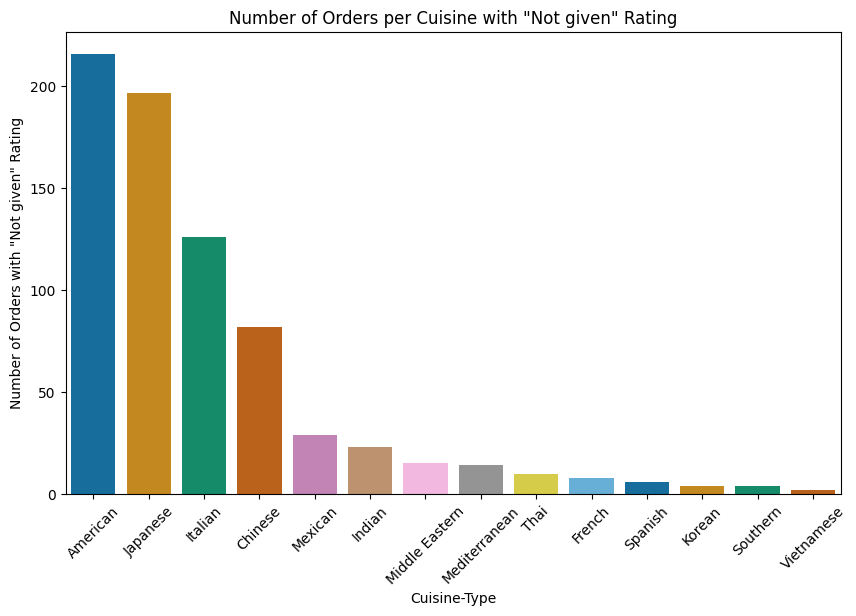

In [ ]:
#Filtering order with not given rating
not_given = df_cpy[df_cpy['rating'] == 'Not given']

#Counting order by cuisine_tupe
not_given_counts = not_given['cuisine_type'].value_counts()

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=not_given_counts.index, y=not_given_counts.values, palette='colorblind')

plt.xlabel('Cuisine-Type')
plt.ylabel('Number of Orders with "Not given" Rating')
plt.title('Number of Orders per Cuisine with "Not given" Rating')


plt.xticks(rotation=45)
plt.show()

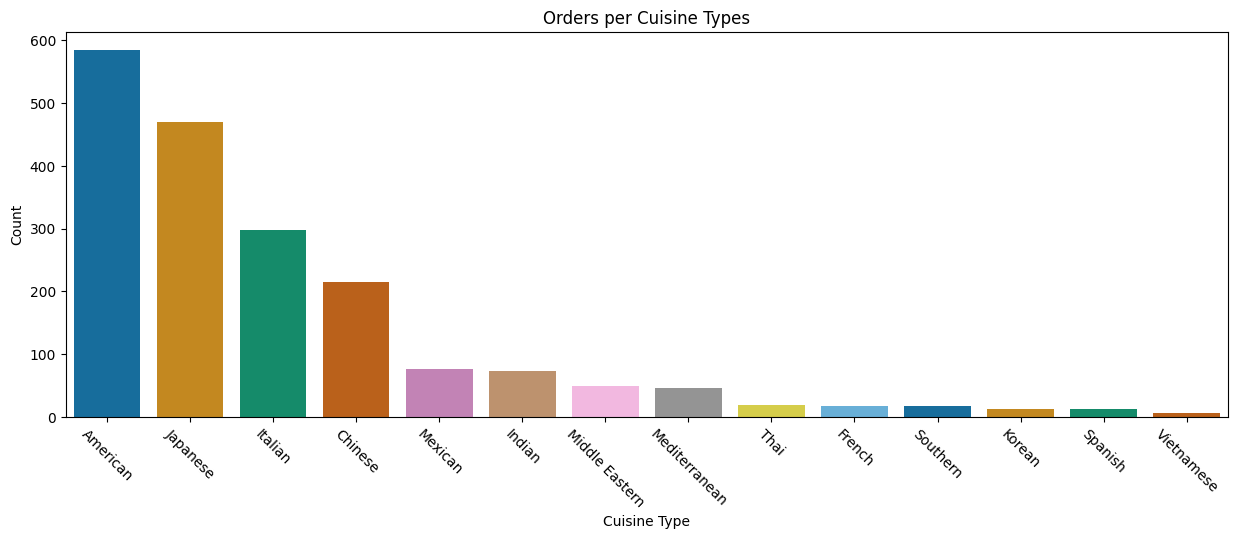

In [ ]:
plt.figure(figsize= (15, 5))
# Order the categories based on the count
order = df_cpy['cuisine_type'].value_counts().index

sns.countplot(data=df_cpy, x='cuisine_type', order=order, palette='colorblind')
plt.xticks(rotation=-45)

plt.title('Orders per Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

plt.show()

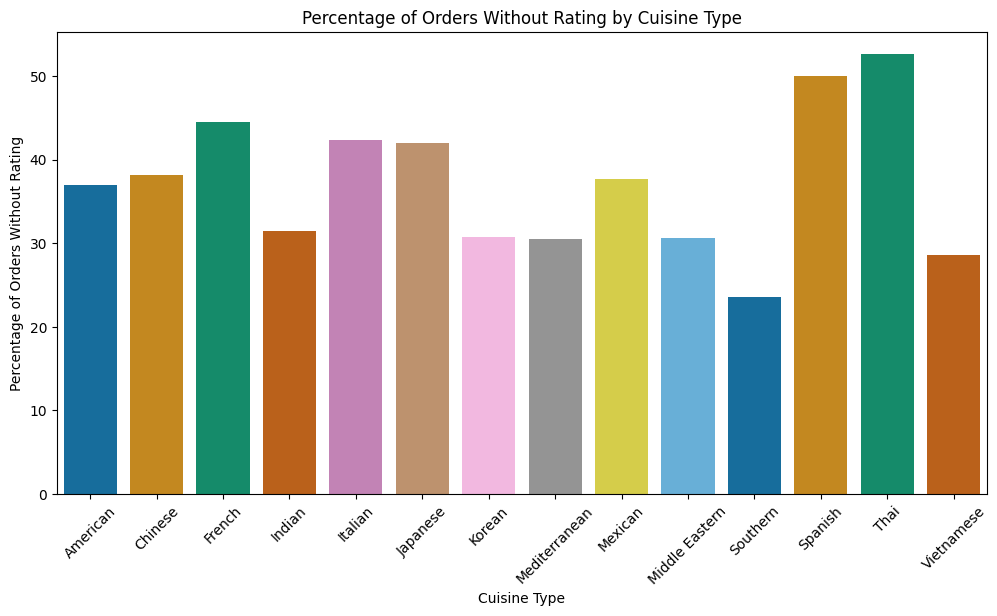

In [ ]:
#Countin total orders and orders without rating
total_orders_cuisine = df_cpy['cuisine_type'].value_counts()
not_given_orders_cuisine = df_cpy[df_cpy['rating'] == 'Not given']['cuisine_type'].value_counts()

#Calculating percentage
not_given_percentage = (not_given_orders_cuisine / total_orders_cuisine) * 100

##NaN to 0 if some cuisine does not have "Not Given" rating)
not_given_percentage = not_given_percentage.fillna(0)

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=not_given_percentage.index, y=not_given_percentage.values, palette='colorblind')

plt.xlabel('Cuisine Type')
plt.ylabel('Percentage of Orders Without Rating')
plt.title('Percentage of Orders Without Rating by Cuisine Type')

plt.xticks(rotation=45)
plt.show()

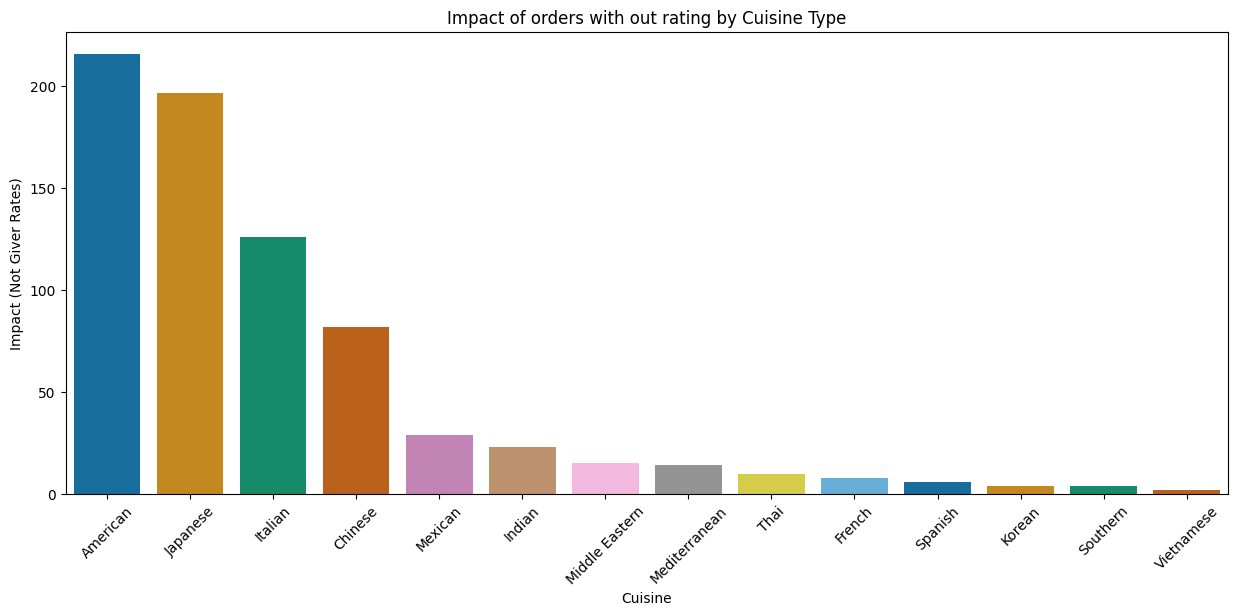

In [ ]:
#Order per cuisine type
orders_per_cuisine = df_cpy['cuisine_type'].value_counts()

#Using not_given_percentage (orders with out rating variable of previus study)
#Create a Df Type_cuisine with count of orders and percentage of not given rates
orders_per_cuisine_plus_percentage = pd.merge(orders_per_cuisine,not_given_percentage,how='outer',on='cuisine_type')

#Adding impact of not rating by cuisine type
orders_per_cuisine_plus_percentage['not_rating_impact'] = orders_per_cuisine_plus_percentage['count_x'].values * (orders_per_cuisine_plus_percentage['count_y'].values / 100)


#Sorting by not_rating_impact
df_sorted_by_impact = orders_per_cuisine_plus_percentage.sort_values(by='not_rating_impact', ascending=False)

#Plot
plt.figure(figsize=(15, 6))
sns.barplot(x='cuisine_type', y='not_rating_impact', data=df_sorted_by_impact, palette='colorblind')

plt.title('Impact of orders with out rating by Cuisine Type')
plt.xticks(rotation=45)
plt.ylabel('Impact (Not Giver Rates)')
plt.xlabel('Cuisine')

# Mostrar gráfico
plt.show()

* The types of cuisine with highest percentage of orders without ratings are Thai, Spanish, French, Italian and Japanese in that order.
* We know from the previous heatmap that there is no relationship between the price of the order and the lack of rating.
* The impact rate of not given rates per cuisine type helps to contrast the percentage of orders without rating and the number of orders by cuisine type.
##### Observations:

>About the percentage we have of "not given" ratings for each cuisine type. It seems to be clear where we need to make efforts to improve (Thai, Spanish, French, Italian and Japanese).

> If we talk about lack of rating in general. It can be said that the lack of rating in American, Japanese and Italian has a much greater impact on the total lack of rating.

#### Cuisine Type and preparation time

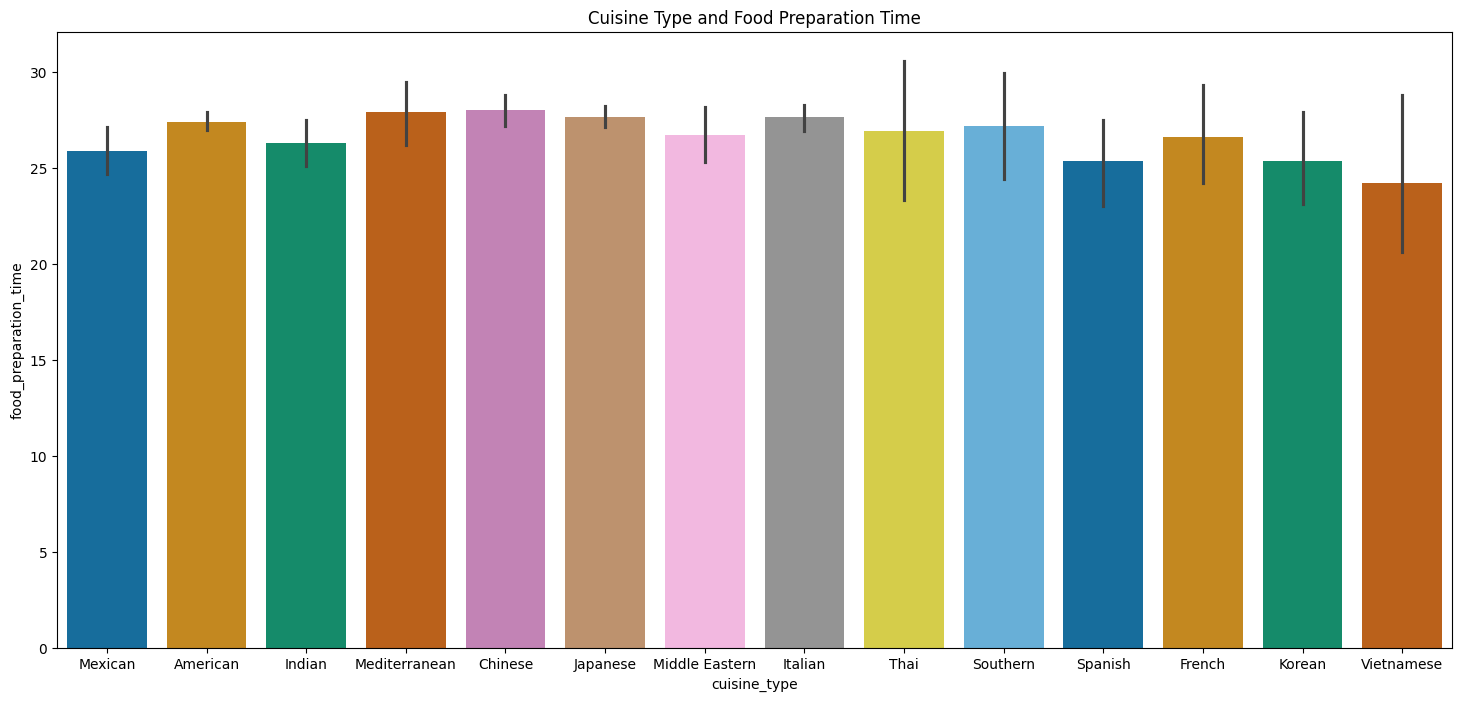

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(data=df_clean_ratings, x='cuisine_type', y='food_preparation_time', palette='colorblind')
plt.title('Cuisine Type and Food Preparation Time')
plt.show()

#### Cuisine Type and Delivery Time

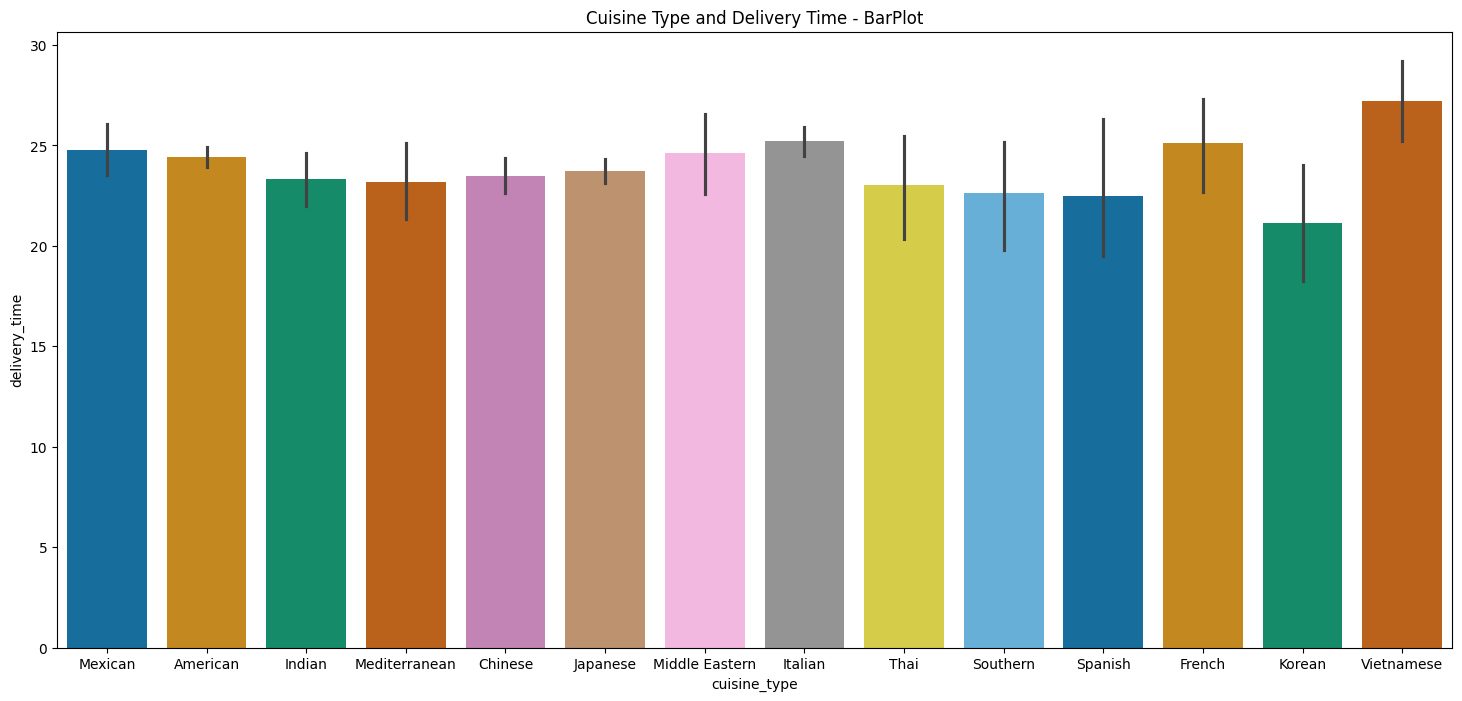

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(data=df_clean_ratings, x='cuisine_type', y='delivery_time', palette='colorblind')
plt.title('Cuisine Type and Delivery Time - BarPlot')
plt.show()

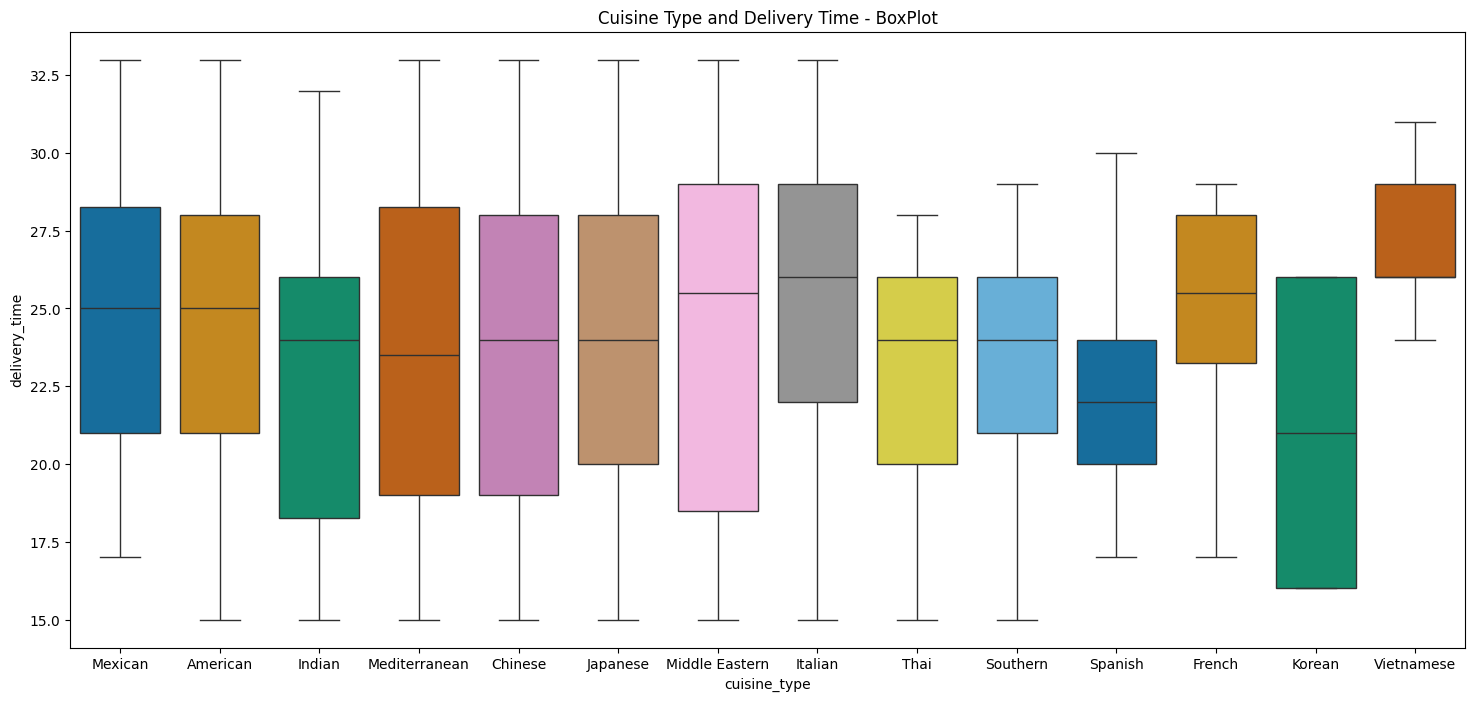

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_clean_ratings, x='cuisine_type', y='delivery_time', palette='colorblind')
plt.title('Cuisine Type and Delivery Time - BoxPlot')
plt.show()

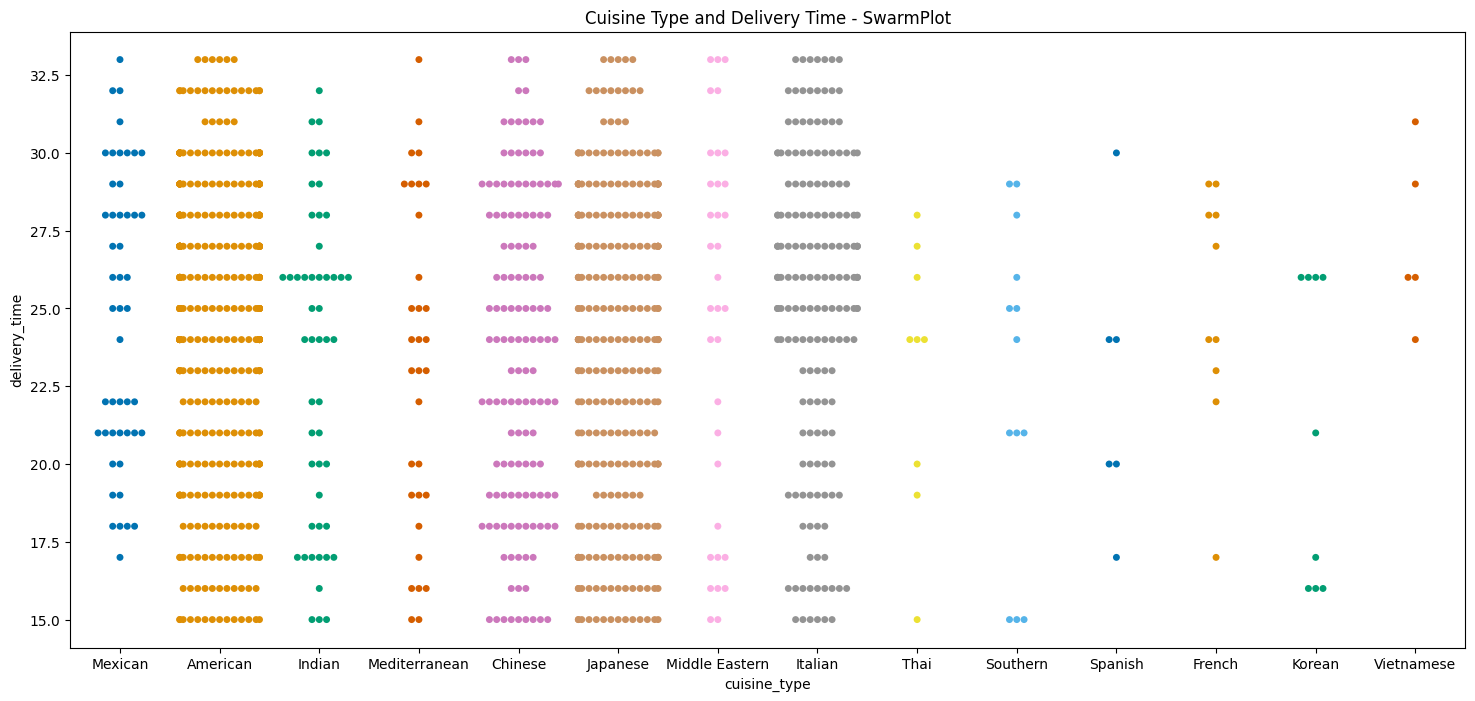

In [ ]:
plt.figure(figsize=(18,8))
sns.swarmplot(data=df_clean_ratings, x='cuisine_type', y='delivery_time', palette='colorblind')
plt.title('Cuisine Type and Delivery Time - SwarmPlot')
plt.show()

##### Obervaitions:

> It doesn't seem to be significant diferences about delivery time between food types. The differences that can be seen in the plots specially in the Box Plot, it can be infered that they are due to the lack of data.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

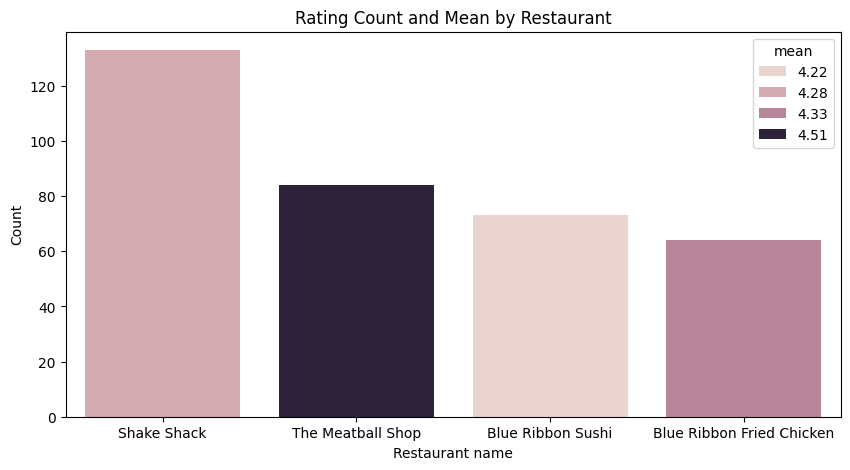

,count,mean
restaurant_name,,
Shake Shack,133,4.28
The Meatball Shop,84,4.51
Blue Ribbon Sushi,73,4.22
Blue Ribbon Fried Chicken,64,4.33


In [ ]:
#Restaurants with more than 50 ratings and rating average greater than 4.

#Restaurants with count and mean rating
rates_count_average = df_clean_ratings.groupby('restaurant_name')['rating'].agg(['count', 'mean']).sort_values('count', ascending=False)

#Selecting restaurants with more than 50 rates
plus_50_rates = rates_count_average[rates_count_average['count']>50]

#Among the restaurants that have more than 50 rates, we choose the ones that have more rating average than 4
plus_50_rates_average_greater_than_4 = round(plus_50_rates[plus_50_rates['mean']>4],2)

plt.figure(figsize=(10,5))
sns.barplot(data=plus_50_rates_average_greater_than_4, x='restaurant_name', y='count', hue='mean')
plt.title('Rating Count and Mean by Restaurant')
plt.ylabel('Count')
plt.xlabel('Restaurant name')
plt.show()



#Cuisines that have more of 50 ratings and greater than 4
plus_50_rates_average_greater_than_4

#### Observations:
The restaurants that have more than 50 rates and an average greater than 4 points are:
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

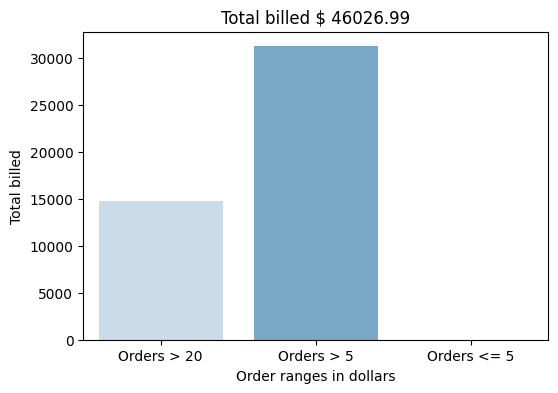



Total billed for orders over $20:
$ 14754.91
Total billed for orders over $5:
$ 31272.08
Number of orders equal or below $5:  9
Total billed for orders equal or below $5:
$ 42.74
Total billed:
$ 46026.99


Revenue of Orders > 20: $3688.73 - 44.02%
Revenue of Orders > 5: $4690.81 - 55.98%
Total revenue: $ 8379.54


In [ ]:
#Total billed for orders over $20.
total_of_orders_plus_20 = df_cpy[df_cpy['cost_of_the_order']>20]['cost_of_the_order'].sum()

#Total billed for orders over $5.
total_of_orders_plus_5 = df_cpy[df_cpy['cost_of_the_order']>5]['cost_of_the_order'].sum()

#Total billed for orders equal or below $5.
total_of_orders_equal_below_5 = df_cpy[df_cpy['cost_of_the_order']<5]['cost_of_the_order'].sum()

#Number of orders equal or below $5.
number_of_orders_equal_below_5 = df_cpy[df_cpy['cost_of_the_order']<5]['cost_of_the_order'].count()

#Total revenue
total_revenue = (total_of_orders_plus_20 * 0.25) + (total_of_orders_plus_5 * 0.15)

#Plot
plot_data={'order_cost':['Orders > 20','Orders > 5','Orders <= 5'], 'total_value': [total_of_orders_plus_20, total_of_orders_plus_5, number_of_orders_equal_below_5]}
plt.figure(figsize=(6, 4))
sns.barplot(x='order_cost', y='total_value', data=plot_data, palette='Blues')
plt.title('Total billed $ 46026.99')
plt.ylabel('Total billed')
plt.xlabel('Order ranges in dollars')
plt.show()

print('\n')
print('Total billed for orders over $20:')
print('$', total_of_orders_plus_20)

print('Total billed for orders over $5:')
print('$', total_of_orders_plus_5)

print('Number of orders equal or below $5: ', number_of_orders_equal_below_5)
print('Total billed for orders equal or below $5:')
print('$', total_of_orders_equal_below_5)

print('Total billed:')
print('$', round(total_of_orders_plus_20  + total_of_orders_plus_5, 2))
print('\n')
print('Revenue of Orders > 20: $' + str(round(total_of_orders_plus_20 * 0.25,2)), "- " + str(round(((total_of_orders_plus_20 * 0.25)*100)/ total_revenue, 2)) + "%")
print('Revenue of Orders > 5: $' + str(round(total_of_orders_plus_5 * 0.15,2)), "- " + str(round(((total_of_orders_plus_5 * 0.15)*100)/ total_revenue, 2)) + "%")
print('Total revenue: $', round(total_revenue, 2))

#### Observations:
* Earning 25% and 15% from orders greater than 20 and 5 dollars respectively. The company's revenue will be $8379.54.

* 56% of the revenue is from orders higher than 5 and below 20 dollars.
* 44% of the revenue is from orders higher than 20 dollars.
* We can see that orders of 5 dollars or less are not significant.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

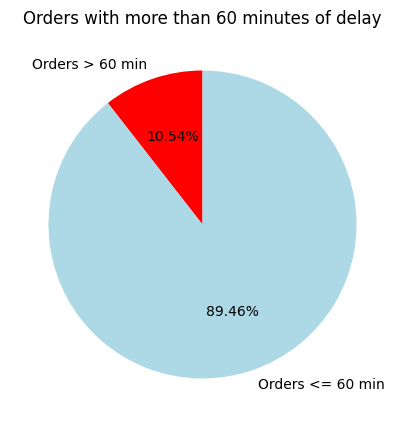



Total of orders : 1898
Total of orders that takes more than 60 minutes : 200
Orders that takes more than 60 minutes:  10.54 %


In [ ]:

#Total orders
total_orders = df_cpy['order_id'].count()
#Total time by order (food_preparation_time + delivery_time )
order_total_time = df_cpy['food_preparation_time'] + df_cpy['delivery_time']

#Number of orders that takes more than 60 minutes.
count_orders_plus_60 = order_total_time[order_total_time >60].count()

#Porcentage of orders that takes more than 60 minutes.
percentage_order_plus_60_minutes = (count_orders_plus_60 *100)/total_orders

# Pie Plot
labels = ['Orders > 60 min','Orders <= 60 min']
sizes = [percentage_order_plus_60_minutes, 100-percentage_order_plus_60_minutes]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, colors=['red', 'lightblue'])
plt.title('Orders with more than 60 minutes of delay')
plt.show()

print('\n')
print('Total of orders :', total_orders)
print('Total of orders that takes more than 60 minutes :', count_orders_plus_60)
print('Orders that takes more than 60 minutes: ', round(percentage_order_plus_60_minutes, 2), '%')


#### Observations:
We can say that 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

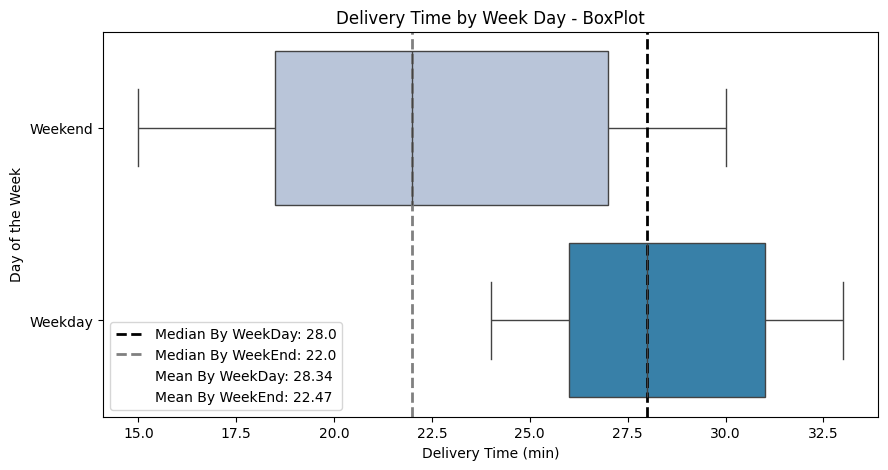

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df_cpy, x='delivery_time', y='day_of_the_week', palette = 'PuBu')

median_by_week = np.round(df_cpy.groupby(['day_of_the_week'])['delivery_time'].median(), 2)[0]
median_by_weekend = np.round(df_cpy.groupby(['day_of_the_week'])['delivery_time'].median(), 2)[1]

# Drowing the median and mode line
plt.axvline(median_by_week, color='black', linestyle='--', linewidth=2, label=f'Median By WeekDay: {median_by_week}')
plt.axvline(median_by_weekend, color='grey', linestyle='--', linewidth=2, label=f'Median By WeekEnd: {median_by_weekend}')

mean_by_week = np.round(df_cpy.groupby(['day_of_the_week'])['delivery_time'].mean(), 2)[0]
mean_by_weekend = np.round(df_cpy.groupby(['day_of_the_week'])['delivery_time'].mean(), 2)[1]

plt.axvline(mean_by_week, color='red', linestyle='', linewidth=2, label=f'Mean By WeekDay: {mean_by_week}')
plt.axvline(mean_by_weekend, color='blue', linestyle='', linewidth=2, label=f'Mean By WeekEnd: {mean_by_weekend}')


#Legend
plt.legend()

plt.title('Delivery Time by Week Day - BoxPlot')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Day of the Week')

plt.show()

In [ ]:
from scipy import stats

week_delivery_time = df_cpy[df_cpy['day_of_the_week']=='Weekday']['delivery_time']
weekend_delivery_time = df_cpy[df_cpy['day_of_the_week']=='Weekend']['delivery_time']
week_delivery_time
weekend_delivery_time


#(H₀): There is no significant difference on delivery times between weekends and weekdays.
#(H₁): The means of delivery times are different (there is a significant difference).
# Realizamos el t-test para muestras independientes
stat, p_value = stats.ttest_ind(weekend_delivery_time, week_delivery_time)

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_value}')

Estadístico de prueba: -27.559138130580667
Valor p: 6.812385861156277e-141


#### Observations:
Delivery time mean increases about 6 minutes on weekdays. And as it can see in the test there is a significant time difference between weekdays and weekends.

---

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

#####Cuisine preference
* American and Japanese foods are the most ordered, followed by Italian and Chinese, respectively
* Top 5 Restaurants, American, Japanese, Italian, Chinese, Mexican.
* The most popular on weekends is Amercian cuisine.

##### Delivery
* The majority of orders are placed on weekends.
* The preparation time remains consistent throughout the week.
* The mean order delyvery time is 24.16 minutes.
* 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.
* Delivery time mean increases about 6 minutes on weekdays.


##### Costs
* The cost of orders does not vary significantly between weekdays and weekends.
* The more popular the type food is, the prices tend to normalize or converge within the same range.
* The percentage of orders higher than $20 is 29.24%.

* The company’s revenue is $8739.

* 56 percent of revenue comes from orders between 5 and 20, and 44 percent from orders over 20 dollars. Orders below 5 dollars are not significant.

##### Rating:
* There is no evidence that rating vary significantly between cuisine types.
* The percent of clients who don't rate their orders are 38.78%.

* About the percentage we have of "not given" ratings for each cuisine type. It seems to be clear where we need to make efforts to improve (Thai, Spanish, French, Italian and Japanese).

* If we talk about lack of rating in general. It can be said that the lack of rating in American, Japanese and Italian has a much greater impact on the total lack of rating.


### Recommendations:

##### Delivery Eime
*  Delivery time mean increases about 6 minutes on weekdays.It was demostrated that it is a significant increase in delivery time.
* It is strongly recommended to gather more information to determine what is causing this large difference.
* Kowing there are much fewer orders on weekdays, it could be said that the problem is not due to the number of orders, but perhaps due to a lack of people to make deliveries.

##### Not Given Ratings
* The percent of clients who don't rate their orders are 38.78%.
* The company has to evaluate if this number is correct or they need to improve it.
* Below I leave a Z.test for when they determine what percentage of "Not given" rates they may have. They can calculate if they are within the desired parameters.


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

#Total of orders and total of not given rates orders
#Already calculated
print('Total orders: '+ str(total_count))
print('Total orders with out rates: '+ str(not_given_count))

#Total of orders with out rates must be <= 38%
#Expected percentage (H0 = 0.3878)
expected_percentage = 0.3878

#H1 Orders with out rates is > 38%
#Test
stat, p_value = proportions_ztest(not_given_count, total_count, expected_percentage)
print(f'Statistic value: {stat}')
print(f'P_value: {p_value}')

Total orders: 1898
Total orders with out rates: 736
Statistic value: -0.0020916504241072784
P_value: 0.9983311056369106



* If they believe that it is necessary to increase the number of ratings. It is strongly recommended aim for American, Japanese and Italian cuisine types where the impact of the total of rating lack is much higher.
* Otherwise, those with the highest percentage of orders without rating are Thai, Spanish, French but they have so few orders that they do not generate a great impact on the total results.